In [34]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt

from src.support_st import *

In [35]:
df = pd.read_csv('data/inventario.csv')
df.head()

,listing_id,artist,title,label,catno,format,release_id,status,price,listed,comments,media_condition,sleeve_condition,accept_offer,external_id,weight,format_quantity,location
0,1161793621,King Tutt,Comin' Out / Even Though,T.K. Disco,458,"12""",694699,Sold,6.00,2021-03-17 06:25:42,Original T.K. Disco Sleeve,Near Mint (NM or M-),Generic,Y,NaN,230,1,039
1,1364731297,King Crimson,In The Court Of The Crimson King,"Polydor, EG",800 030-2,"CD, Album, RE",2981367,Sold,17.00,2021-03-17 07:05:50,NaN,Near Mint (NM or M-),Near Mint (NM or M-),Y,NaN,85,1,HBalda12
2,1287142647,David S. Ware String Ensemble,Threads,Thirsty Ear,THI57137.2,"CD, Album",1099653,Sold,11.00,2021-03-17 07:08:13,SEALED (Precintado),Mint (M),Mint (M),Y,NaN,85,1,HCajón01
3,1287144780,David Eyges,The Captain,MidLantic Records,MR2002-103,"CD, Album, RE",10108236,Sold,9.99,2021-03-17 07:08:14,Almost like new. Private Collection. Close to ...,Near Mint (NM or M-),Near Mint (NM or M-),Y,NaN,85,1,HCajón01
4,1362016279,"Dmitri Shostakovich, Государственный Симфониче...","Symphony No 5 In D Minor Op 47, Symphony No 9 ...",Olympia (2),OCD 113,CD,10422040,Sold,9.99,2021-03-17 07:08:14,NaN,Near Mint (NM or M-),Near Mint (NM or M-),Y,NaN,85,1,HBalda20


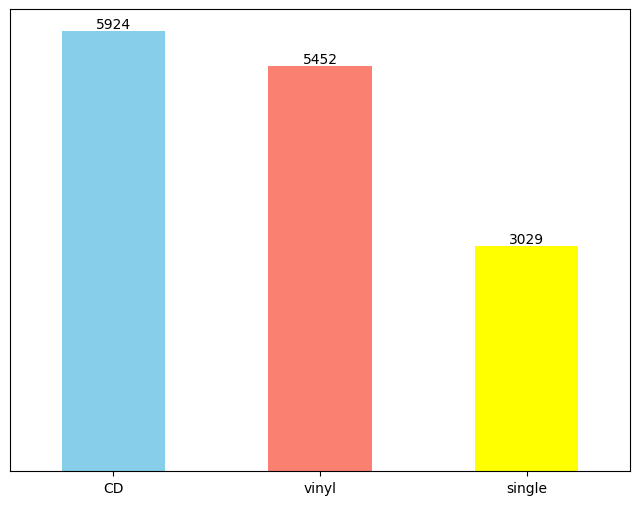

In [36]:
df = pd.read_csv('data/inventario.csv')
df = df[df.status == 'Sold']    

df[['CD', 'vinyl', 'single']] = df['format'].apply(lambda x: pd.Series(format_string(x)))
df.drop('format', axis=1, inplace=True)

format_counts = df[['CD', 'vinyl', 'single']].sum()

plt.figure(figsize=(8, 6))
ax = format_counts.plot(kind='bar', color=['skyblue', 'salmon', 'yellow'])

plt.ylabel('Recuento')

# Ocultar solo el eje Y
plt.gca().get_yaxis().set_visible(False)

# Convertir los nombres del índice a una lista de cadenas para usar en xticks
labels = list(format_counts.index)

# Mostrar el recuento en las barras
for i, count in enumerate(format_counts):
    x = i
    y = count
    plt.text(x, y + 0.5, f'{count}', ha='center', va='bottom')

plt.xticks(range(len(format_counts)), labels, rotation=0)
plt.show()